# Training and Inferencing Model Using Data Cleaning Methods

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA

In [3]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge

pd.set_option('max_colwidth',200)
pd.set_option('display.width',200)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

#from xgboost import XGBRegressor

# 1. Data Cleaning

In [4]:
full = pd.read_excel('new_data_1.xls')
full = full.drop(columns=["Qingpu","0"])
full = full.loc[:, ~full.columns.str.contains('^Unnamed')]
full.head()

,Price,Area,Bedrooms,Livingrooms,Bathrooms,Floor,NextToSubway,Exquisite,OpenForVisits,Longitude,Latitude,863098207ffffff,86309820fffffff,863098217ffffff,86309821fffffff,863098227ffffff,86309822fffffff,863098237ffffff,863098247ffffff,86309824fffffff,863098257ffffff,86309825fffffff,863098267ffffff,86309826fffffff,863098277ffffff,863098287ffffff,86309828fffffff,863098297ffffff,86309829fffffff,8630982afffffff,8630982c7ffffff,8630982cfffffff,8630982d7ffffff,8630982dfffffff,8630982e7ffffff,8630982efffffff,8630982f7ffffff,863098307ffffff,863098347ffffff,86309834fffffff,863098357ffffff,86309835fffffff,86309836fffffff,86309838fffffff,8630983afffffff,86309864fffffff,863098657ffffff,863098667ffffff,86309874fffffff,863098967ffffff,863098c57ffffff,863099407ffffff,86309940fffffff,863099417ffffff,86309941fffffff,863099427ffffff,863099437ffffff,863099487ffffff,86309948fffffff,863099497ffffff,86309949fffffff,8630994a7ffffff,8630994afffffff,8630994b7ffffff,8630994c7ffffff,8630994cfffffff,8630994d7ffffff,8630994dfffffff,8630994e7ffffff,8630994efffffff,8630994f7ffffff,863099507ffffff,863099517ffffff,86309951fffffff,863099527ffffff,863099537ffffff,863099587ffffff,86309958fffffff,863099597ffffff,86309959fffffff,8630995a7ffffff,8630995afffffff,8630995b7ffffff,863099c27ffffff,863099c87ffffff,863099c97ffffff,863099c9fffffff,86309aa67ffffff,86309b117ffffff,86309b147ffffff,86309b167ffffff,86309b177ffffff,86309b807ffffff,86309b80fffffff,86309b827ffffff,86309b82fffffff,86309b837ffffff,86309b847ffffff,86309b84fffffff,86309b857ffffff,86309b85fffffff,86309b867ffffff,86309b86fffffff,86309b877ffffff,86309b89fffffff,86309b8a7ffffff,86309b8afffffff,86309b8c7ffffff,86309b8cfffffff,86309b8efffffff,86309b907ffffff,86309b90fffffff,86309b917ffffff,86309b91fffffff,86309b927ffffff,86309b92fffffff,86309b937ffffff,86309b947ffffff,86309b94fffffff,86309b957ffffff,86309b95fffffff,86309b967ffffff,86309b96fffffff,86309b977ffffff,86309b99fffffff,86309b9afffffff,86309ba0fffffff,86309ba17ffffff,86309ba27ffffff,86309ba2fffffff,86309ba57ffffff,86309ba8fffffff,86309bacfffffff,86309badfffffff,86309baf7ffffff,86309bb07ffffff,86309bb0fffffff,86309bb17ffffff,86309bb1fffffff,86309bb27ffffff,86309bb37ffffff,86309bb57ffffff,86309bb77ffffff,86309bb8fffffff,86309bb9fffffff,86309bba7ffffff,86309bbb7ffffff,86309bc4fffffff,86309bc67ffffff,86309bd6fffffff,86309d68fffffff,86318c74fffffff,86401970fffffff,864118b27ffffff,864189057ffffff
0,6700,65.00,2.0,0,NaN,NaN,1,NaN,NaN,121.489484,31.240373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8500,91.00,2.0,2,NaN,NaN,1,NaN,NaN,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2600,56.07,2.0,1,NaN,NaN,1,NaN,NaN,121.440338,31.419139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5500,84.00,2.0,2,NaN,NaN,1,NaN,NaN,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6800,78.00,1.0,2,NaN,NaN,1,NaN,NaN,121.543922,31.278916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [5]:
for col in full:
    full[col] = pd.to_numeric(full[col], errors='coerce')
full.head()

,Price,Area,Bedrooms,Livingrooms,Bathrooms,Floor,NextToSubway,Exquisite,OpenForVisits,Longitude,Latitude,863098207ffffff,86309820fffffff,863098217ffffff,86309821fffffff,863098227ffffff,86309822fffffff,863098237ffffff,863098247ffffff,86309824fffffff,863098257ffffff,86309825fffffff,863098267ffffff,86309826fffffff,863098277ffffff,863098287ffffff,86309828fffffff,863098297ffffff,86309829fffffff,8630982afffffff,8630982c7ffffff,8630982cfffffff,8630982d7ffffff,8630982dfffffff,8630982e7ffffff,8630982efffffff,8630982f7ffffff,863098307ffffff,863098347ffffff,86309834fffffff,863098357ffffff,86309835fffffff,86309836fffffff,86309838fffffff,8630983afffffff,86309864fffffff,863098657ffffff,863098667ffffff,86309874fffffff,863098967ffffff,863098c57ffffff,863099407ffffff,86309940fffffff,863099417ffffff,86309941fffffff,863099427ffffff,863099437ffffff,863099487ffffff,86309948fffffff,863099497ffffff,86309949fffffff,8630994a7ffffff,8630994afffffff,8630994b7ffffff,8630994c7ffffff,8630994cfffffff,8630994d7ffffff,8630994dfffffff,8630994e7ffffff,8630994efffffff,8630994f7ffffff,863099507ffffff,863099517ffffff,86309951fffffff,863099527ffffff,863099537ffffff,863099587ffffff,86309958fffffff,863099597ffffff,86309959fffffff,8630995a7ffffff,8630995afffffff,8630995b7ffffff,863099c27ffffff,863099c87ffffff,863099c97ffffff,863099c9fffffff,86309aa67ffffff,86309b117ffffff,86309b147ffffff,86309b167ffffff,86309b177ffffff,86309b807ffffff,86309b80fffffff,86309b827ffffff,86309b82fffffff,86309b837ffffff,86309b847ffffff,86309b84fffffff,86309b857ffffff,86309b85fffffff,86309b867ffffff,86309b86fffffff,86309b877ffffff,86309b89fffffff,86309b8a7ffffff,86309b8afffffff,86309b8c7ffffff,86309b8cfffffff,86309b8efffffff,86309b907ffffff,86309b90fffffff,86309b917ffffff,86309b91fffffff,86309b927ffffff,86309b92fffffff,86309b937ffffff,86309b947ffffff,86309b94fffffff,86309b957ffffff,86309b95fffffff,86309b967ffffff,86309b96fffffff,86309b977ffffff,86309b99fffffff,86309b9afffffff,86309ba0fffffff,86309ba17ffffff,86309ba27ffffff,86309ba2fffffff,86309ba57ffffff,86309ba8fffffff,86309bacfffffff,86309badfffffff,86309baf7ffffff,86309bb07ffffff,86309bb0fffffff,86309bb17ffffff,86309bb1fffffff,86309bb27ffffff,86309bb37ffffff,86309bb57ffffff,86309bb77ffffff,86309bb8fffffff,86309bb9fffffff,86309bba7ffffff,86309bbb7ffffff,86309bc4fffffff,86309bc67ffffff,86309bd6fffffff,86309d68fffffff,86318c74fffffff,86401970fffffff,864118b27ffffff,864189057ffffff
0,6700,65.00,2.0,0,NaN,NaN,1,NaN,NaN,121.489484,31.240373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8500,91.00,2.0,2,NaN,NaN,1,NaN,NaN,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2600,56.07,2.0,1,NaN,NaN,1,NaN,NaN,121.440338,31.419139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5500,84.00,2.0,2,NaN,NaN,1,NaN,NaN,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6800,78.00,1.0,2,NaN,NaN,1,NaN,NaN,121.543922,31.278916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [6]:
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)

Bathrooms        19031
OpenForVisits     7496
Exquisite         7496
Floor             3018
Latitude          1477
Longitude         1477
Bedrooms             1
dtype: int64

In [7]:
print(full['Longitude'].mean())
print(full['Latitude'].mean())

121.45541007503495
31.21349035829091


### Filling Empty Datas

In [8]:
cols=["Exquisite", "OpenForVisits"]
for col in cols:
    full[col].fillna(0, inplace=True)

### washrooms

In [9]:
temp = []
areas = full["Area"]
for a in areas:
    t = math.floor(a/120)+1
    temp.append(t)
full["temp"] = temp
full["Bathrooms"].fillna(full["temp"], inplace=True)
full = full.drop(columns=["temp"])
full.head()

,Price,Area,Bedrooms,Livingrooms,Bathrooms,Floor,NextToSubway,Exquisite,OpenForVisits,Longitude,Latitude,863098207ffffff,86309820fffffff,863098217ffffff,86309821fffffff,863098227ffffff,86309822fffffff,863098237ffffff,863098247ffffff,86309824fffffff,863098257ffffff,86309825fffffff,863098267ffffff,86309826fffffff,863098277ffffff,863098287ffffff,86309828fffffff,863098297ffffff,86309829fffffff,8630982afffffff,8630982c7ffffff,8630982cfffffff,8630982d7ffffff,8630982dfffffff,8630982e7ffffff,8630982efffffff,8630982f7ffffff,863098307ffffff,863098347ffffff,86309834fffffff,863098357ffffff,86309835fffffff,86309836fffffff,86309838fffffff,8630983afffffff,86309864fffffff,863098657ffffff,863098667ffffff,86309874fffffff,863098967ffffff,863098c57ffffff,863099407ffffff,86309940fffffff,863099417ffffff,86309941fffffff,863099427ffffff,863099437ffffff,863099487ffffff,86309948fffffff,863099497ffffff,86309949fffffff,8630994a7ffffff,8630994afffffff,8630994b7ffffff,8630994c7ffffff,8630994cfffffff,8630994d7ffffff,8630994dfffffff,8630994e7ffffff,8630994efffffff,8630994f7ffffff,863099507ffffff,863099517ffffff,86309951fffffff,863099527ffffff,863099537ffffff,863099587ffffff,86309958fffffff,863099597ffffff,86309959fffffff,8630995a7ffffff,8630995afffffff,8630995b7ffffff,863099c27ffffff,863099c87ffffff,863099c97ffffff,863099c9fffffff,86309aa67ffffff,86309b117ffffff,86309b147ffffff,86309b167ffffff,86309b177ffffff,86309b807ffffff,86309b80fffffff,86309b827ffffff,86309b82fffffff,86309b837ffffff,86309b847ffffff,86309b84fffffff,86309b857ffffff,86309b85fffffff,86309b867ffffff,86309b86fffffff,86309b877ffffff,86309b89fffffff,86309b8a7ffffff,86309b8afffffff,86309b8c7ffffff,86309b8cfffffff,86309b8efffffff,86309b907ffffff,86309b90fffffff,86309b917ffffff,86309b91fffffff,86309b927ffffff,86309b92fffffff,86309b937ffffff,86309b947ffffff,86309b94fffffff,86309b957ffffff,86309b95fffffff,86309b967ffffff,86309b96fffffff,86309b977ffffff,86309b99fffffff,86309b9afffffff,86309ba0fffffff,86309ba17ffffff,86309ba27ffffff,86309ba2fffffff,86309ba57ffffff,86309ba8fffffff,86309bacfffffff,86309badfffffff,86309baf7ffffff,86309bb07ffffff,86309bb0fffffff,86309bb17ffffff,86309bb1fffffff,86309bb27ffffff,86309bb37ffffff,86309bb57ffffff,86309bb77ffffff,86309bb8fffffff,86309bb9fffffff,86309bba7ffffff,86309bbb7ffffff,86309bc4fffffff,86309bc67ffffff,86309bd6fffffff,86309d68fffffff,86318c74fffffff,86401970fffffff,864118b27ffffff,864189057ffffff
0,6700,65.00,2.0,0,1.0,NaN,1,0.0,0.0,121.489484,31.240373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8500,91.00,2.0,2,1.0,NaN,1,0.0,0.0,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2600,56.07,2.0,1,1.0,NaN,1,0.0,0.0,121.440338,31.419139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5500,84.00,2.0,2,1.0,NaN,1,0.0,0.0,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6800,78.00,1.0,2,1.0,NaN,1,0.0,0.0,121.543922,31.278916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### floor

In [10]:
cols=["Bedrooms","Floor", "Longitude","Latitude"]
for col in cols:
    full[col].fillna(full[col].mean(), inplace=True)
full["Floor"]=full["Floor"].astype(np.int)
full["Bedrooms"]=full["Bedrooms"].astype(np.int)

## Cliping

In [11]:

full = full[full['Price']<=40000]
full = full[full['Price']>1000]
full.shape

(19137, 155)

## Saving Train & Test

In [12]:
train, validate, test = np.split(full.sample(frac=1, random_state=42), [int(.6*len(full)), int(.8*len(full))])
train.to_excel('train.xls')
validate.to_excel('validate.xls')
test.to_excel('test.xls')

## Scale & Calculate

In [12]:
from sklearn.model_selection import train_test_split

X = full.drop(columns = ["Price"])
y = full["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

X_train.shape[0]

17223

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
#scaler = RobustScaler()
scaler = StandardScaler()

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(y)

test_X_scaled = scaler.transform(X_test)
X["Livingrooms"].head()

0    0
1    2
2    1
3    2
4    2
Name: Livingrooms, dtype: int64

## Feature Selection

In [14]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y)
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X.columns)
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
Latitude,6791.233978
Area,6160.906537
8630994b7ffffff,2483.320501
86309bb07ffffff,2222.110391
Floor,1811.754814
8630994afffffff,1272.986551
864118b27ffffff,984.746921
Bedrooms,892.366096
8630994a7ffffff,888.073665
Exquisite,795.899225


In [15]:
X_new = X.drop(columns=FI_lasso.index[abs(FI_lasso['Feature Importance'])<200])

X_new.shape

(19137, 104)

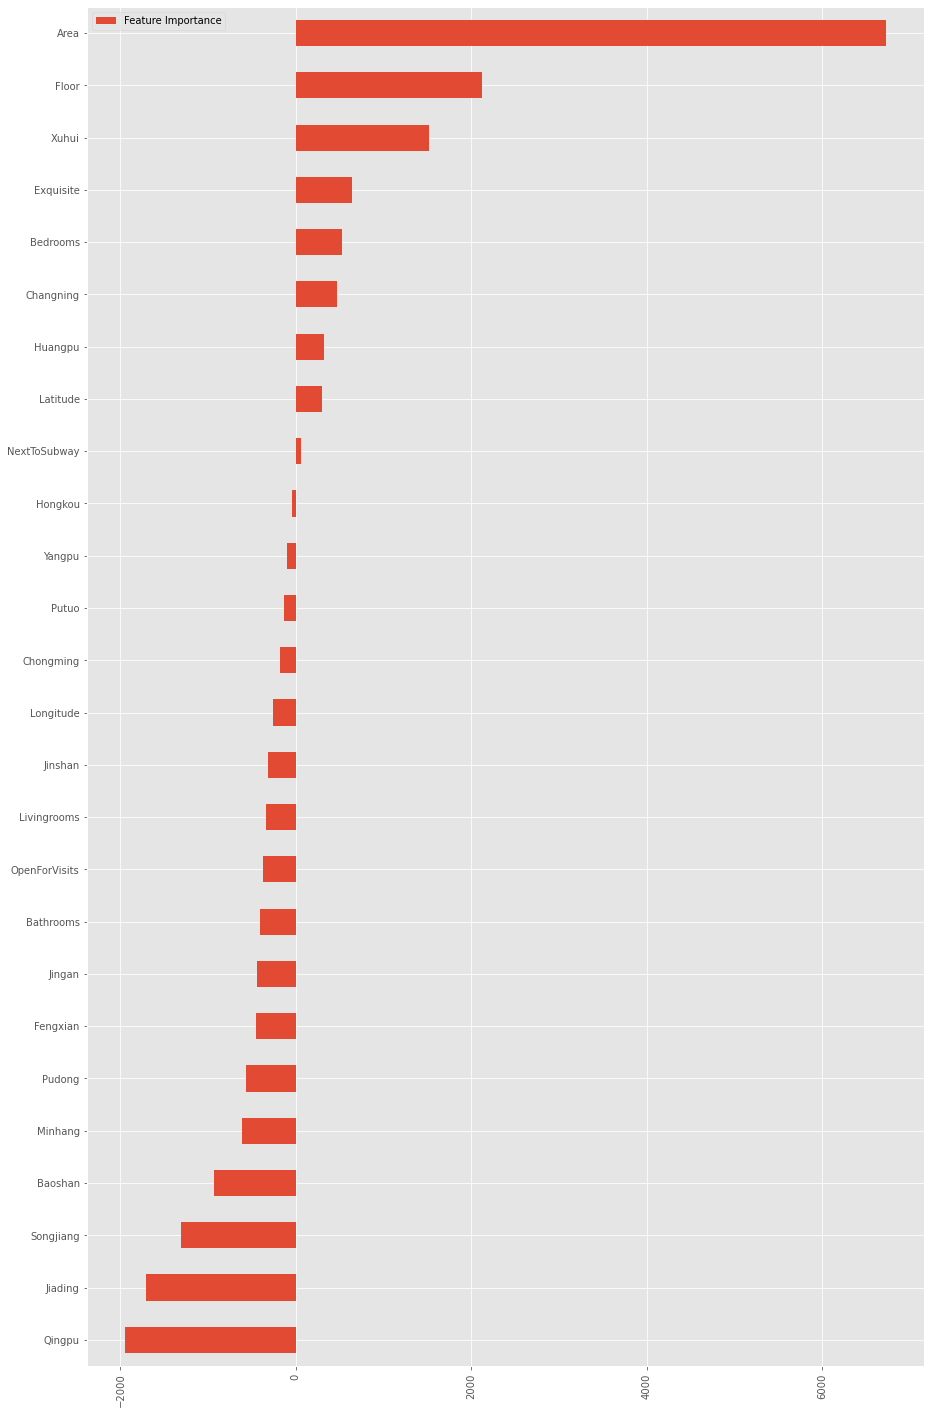

In [17]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
#scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=0)
scaler = StandardScaler()

X_scaled = scaler.fit(X_new).transform(X_new)
y_log = np.log(y)

test_X_scaled = scaler.transform(X_test)

## Droping weak features

In [24]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

def mae_cv(model,X,y):
    mae = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=5)
    return mae

In [22]:
models = [LinearRegression(),
          Ridge(),
          Lasso(alpha=0.01,max_iter=10000),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          #SVR(),
          LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),
          #SGDRegressor(max_iter=10000,tol=1e-3),
          BayesianRidge(),
          KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor()]
names = ["LR", "Ridge", "Lasso", "RF", "GBR","LinSVR", "Ela","Bay","Ker","Extra"]

In [25]:
for name, model in zip(names, models):
    score = mae_cv(model, X_scaled, y)
    print("{}: {:.4f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 8635479038065222.0000, 17270958076125492.0000
Ridge: 2771.2983, 887.5685
Lasso: 2772.6721, 890.3773
RF: 958.4150, 822.9191
GBR: 1280.5238, 693.3779
LinSVR: 4381.8209, 1264.1943
Ela: 2762.5517, 869.2874
Bay: 2768.8635, 878.2942
Ker: 1470.2889, 788.6965
Extra: 1012.1788, 887.5109


#### RF | GBR | SVR | Extra | looks good, thus try grid search method

In [26]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,
                                   param_grid,
                                   cv=5, 
                                   scoring="neg_mean_absolute_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = -grid_search.cv_results_['mean_test_score']
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [27]:
grid(RandomForestRegressor()).grid_get(X_scaled,y,{'n_estimators':[1]})

{'n_estimators': 60} 30.83656816699433
                  params  mean_test_score  std_test_score
0   {'n_estimators': 10}       971.638990      831.711231
1   {'n_estimators': 15}       965.728592      823.479513
2   {'n_estimators': 20}       966.922628      838.494518
3   {'n_estimators': 25}       960.995325      824.114422
4   {'n_estimators': 30}       960.032017      830.533519
5   {'n_estimators': 35}       963.274620      834.773352
6   {'n_estimators': 40}       953.784902      827.977684
7   {'n_estimators': 45}       968.302572      835.408834
8   {'n_estimators': 50}       952.124363      821.506561
9   {'n_estimators': 55}       959.197901      826.699874
10  {'n_estimators': 60}       950.893936      824.234181
11  {'n_estimators': 65}       959.654704      823.844067


In [53]:
from sklearn.metrics import mean_absolute_error
y_mean = np.mean(y)
mean_absolute_error(y*0+y_mean,y)

7242.615102169672

In [28]:

score = rmse_cv(RandomForestRegressor(n_estimators=60), X_scaled, y)
print("{}: {:.4f}, {:.4f}".format("name",score.mean(),score.std()))

name: 1971.9027, 1529.6154


In [32]:
grid(GradientBoostingRegressor()).grid_get(X_scaled,y,{'n_estimators':[1000,1500,2000],
                                                       'subsample':[0.8],
                                                       'learning_rate':[0.05,0.1]
                                                      })

{'learning_rate': 0.05, 'n_estimators': 2000, 'subsample': 0.8} 31.44322018981088
                                                            params  mean_test_score  std_test_score
0  {'learning_rate': 0.05, 'n_estimators': 1000, 'subsample': 0.8}      1084.497970      790.328156
1  {'learning_rate': 0.05, 'n_estimators': 1500, 'subsample': 0.8}      1017.174824      779.740089
2  {'learning_rate': 0.05, 'n_estimators': 2000, 'subsample': 0.8}       988.676096      784.494372
3   {'learning_rate': 0.1, 'n_estimators': 1000, 'subsample': 0.8}      1041.640074      797.032870
4   {'learning_rate': 0.1, 'n_estimators': 1500, 'subsample': 0.8}      1016.057408      815.251036
5   {'learning_rate': 0.1, 'n_estimators': 2000, 'subsample': 0.8}      1046.082917      822.174523


In [33]:
grid(ExtraTreesRegressor()).grid_get(X_scaled,y,{'n_estimators':[78,79,80,81,82]})

{'n_estimators': 80} 31.587049333674404
                 params  mean_test_score  std_test_score
0  {'n_estimators': 60}      1012.754442      873.467774
1  {'n_estimators': 70}      1007.731765      881.360201
2  {'n_estimators': 80}       997.741686      867.472322
3  {'n_estimators': 90}      1012.228877      881.416198


In [42]:
param_grid={'alpha':[0.15], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.2]}
grid(KernelRidge()).grid_get(X_scaled,y,param_grid)

{'alpha': 0.15, 'coef0': 0.2, 'degree': 3, 'kernel': 'polynomial'} 35.74794099767856
                                                               params  mean_test_score  std_test_score
0  {'alpha': 0.15, 'coef0': 0.2, 'degree': 3, 'kernel': 'polynomial'}      1277.915286      779.264694


## Weight Average

In [31]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [43]:
# Getting Models
RF = RandomForestRegressor(n_estimators=60)
GBR = GradientBoostingRegressor(learning_rate=0.05, n_estimators=2000, subsample=0.8)
Extra = ExtraTreesRegressor(n_estimators=80)
Kernel = KernelRidge(alpha=0.15, kernel="polynomial", degree=3, coef0=0.2)

In [44]:
# Initializing Weights
w_RF = 0.3
w_GBR = 0.3
w_Extra = 0.2
w_Kernel = 0.2

In [45]:
weight_avg = AverageWeight(mod = [RF, GBR, Extra, Kernel],weight=[w_RF,w_GBR,w_Extra,w_Kernel])

In [46]:
mae_cv(weight_avg,X_scaled,log_y),  mae_cv(weight_avg,X_scaled,log_y).mean()

(array([0.32848403, 0.12136994, 0.00904941, 0.02810097, 0.19783717]),
 0.13787300124298746)

## Stacking

In [47]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [55]:
from sklearn.impute import SimpleImputer
a = SimpleImputer().fit_transform(X_scaled)
b = SimpleImputer().fit_transform(y.values.reshape(-1,1)).ravel()
stack_model = stacking(mod=[GBR, Extra, Kernel],meta_model=RF)
mae = mae_cv(stack_model,a,b)
print(mae)
print(mae.mean())

[2.21404897e+03 1.63827881e+03 1.24449525e+00 1.16989744e+02
 9.43529250e+02]
982.8182540200735
